In [2]:
import tensorflow as tf
from keras.models import load_model
from keras import optimizers
from yolo3 import model
from yolo3.postprocess_np import yolo3_postprocess_np
from common.data_utils import preprocess_image

from common.utils import get_dataset, get_classes, get_anchors
from common.utils import get_dataset, get_classes, get_anchors, get_colors, get_colors_fixed_map, _draw_boxes3, \
    optimize_tf_gpu, \
    get_custom_objects

anchor = "configs/yolo3_anchors.txt"
anchors = get_anchors(anchor)
class_names = get_classes("configs/kitty_all_except_nodata.txt")

c:\Users\ahmed\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [30]:
custom_object_dict = get_custom_objects()

model = load_model("ep043-dump.h5", compile=False,custom_objects=custom_object_dict)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image_input (InputLayer)       [(None, 608, 608, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 303, 303, 32  864         ['image_input[0][0]']            
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 303, 303, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [31]:
for layer in model.layers[:-1]:
    layer.trainable=False

In [32]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image_input (InputLayer)       [(None, 608, 608, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 303, 303, 32  864         ['image_input[0][0]']            
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 303, 303, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [33]:
import numpy as np
from PIL import Image
import cv2
img = Image.open("D:/DataSets/kitty/data_object_image_2/training/image_2/000219.png")
image=preprocess_image(img,(608,608))
im_shape = tuple(reversed(img.size))


In [34]:
out=model.predict([image])

1/1 [==============================] - 5s 5s/step


In [35]:
print(out[0])

[[[[ 9.5545018e-01  2.0201349e+00  9.6378714e-02 ... -4.7083669e+00
    -3.5354447e+00  3.5000527e+00]
   [-8.6266920e-02  2.9135220e+00  2.2133872e-01 ... -4.1604543e+00
    -3.5122564e+00  3.8252990e+00]
   [ 2.4067076e-01  2.7310631e+00  1.6531017e-01 ... -4.8804708e+00
    -4.5104284e+00  4.7971716e+00]
   ...
   [ 7.6161879e-01  2.1260500e+00  4.7022566e-01 ... -5.2950940e+00
    -5.2283201e+00  4.6666908e+00]
   [ 6.4150673e-01  2.3672509e+00  7.4097508e-01 ... -5.5453811e+00
    -4.8822536e+00  4.9136057e+00]
   [-9.4990653e-01  1.1118585e+00  5.8512354e-01 ... -4.8312473e+00
    -5.5730543e+00  4.1649079e+00]]

  [[ 1.4138489e+00  6.9365686e-01 -2.3561570e-01 ... -3.9655781e+00
    -2.8335640e+00  2.7566574e+00]
   [ 5.0096709e-02  8.3651561e-01 -3.8460106e-01 ... -3.3199449e+00
    -2.8818676e+00  3.2971122e+00]
   [ 2.6981255e-01  7.1339262e-01 -2.0866069e-01 ... -4.1707630e+00
    -4.1932516e+00  4.8148832e+00]
   ...
   [ 6.7947999e-02 -6.4339779e-02  6.4468563e-01 ... -5.6

In [36]:

pred_boxes, pred_classes, pred_scores, pred_distances = yolo3_postprocess_np(out, (375, 1242), anchors,
                                                                             len(class_names), (
                                                                                 608, 608),
                                                                            max_boxes=100,
                                                                            confidence=0.2,
                                                                            elim_grid_sense=False)


In [1]:
print(pred_distances)


41.87392807


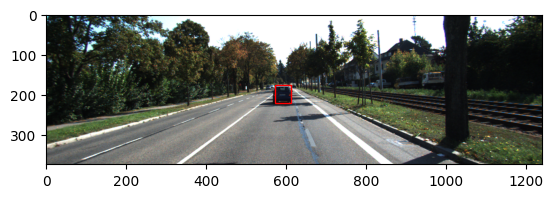

In [38]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


fig, ax = plt.subplots()
ax.imshow(img)

for box in pred_boxes:
    x1, y1, x2, y2 = box
    width = x2 - x1
    height = y2 - y1
    rect = Rectangle((x1, y1), width, height, fill=False, color='red')
    ax.add_patch(rect)

plt.axis('on')

plt.show()
